# Data and Analysis Plan: College Basketball to NBA: Star Prediction
## Team-13

- Amaan Bhojani (bhojani.a@northeastern.edu)
- Jirawat Zhou (zhou.jir@northeastern.edu)
- Joshua Newstadt (newstadt.j@northeastern.edu)
- Jarrett Anderson (anderson.jar@northeastern.edu)


## Project Goal:
Our motivation for the project is to try and see if we can predict which current college basketball players will have successful NBA players. Even today, certain college players seem like they will be stars in the league and they end up being busts, we aim to shed some light as to whose skills will properly translate at the next level. 

## Overview:
We will scrape our data from two separate websites. 

#### Basketball Reference
The first site we will scrape is basketball-reference.com which will give us a [list of all Players](https://www.basketball-reference.com/leagues/NBA_2021_totals.html) for a given season which we can reference to find their [college stats](https://www.basketball-reference.com/players).

<img src="https://lh3.googleusercontent.com/zcmiuxLfVzrc1x2NzxZ4mbuQ7-2mMAMpgnx7-EPHwu0mZrW3_gnMZ3R2gLu6X8-8nP448wiK724nJdltPsGonYT8dRD-_0zd_U9KOLlDs0NT-NeEQffvXjTxxlihJGLPeeMXgAs4ECU=w2400" width=800px/>

From the list of players we can obtain:
- name
- url to specific player page

<img src="https://lh3.googleusercontent.com/LvO1eGKEqjfSLe_OZeXCA4zjDx6-ifVXGq9YeXSAc7b_Qf-lee-QMWrM-3RZpS_h1a0u8u-BXKGzrPFbtciSqm-YnrVbUHtJLk6yb7yLUMSkaaZsSxDPey71r_qjr3TqyyZWiZ-7EWM=w2400">

Upon visiting an individual player's page we can find their college stats.

<img src="https://lh3.googleusercontent.com/pk68MH39TLKlwvPJQTZnZPVHbiWC55S3LNfZrivqDA0RZQSDGYliGO-xOIfUpN6D4Er3Yz9a6B2-zgLVHbmA_XG4FukDrPaAjzzzcggQWBralbFjgkl7CEMersioOxbPrY-S4Z4ZplQ=w2400">

This is the table we are targeting as it contains the:
- season
- age
- college
- total stats for the season

Some players will have played multiple college seasons while other only one. To simplify our analysis, each player's college stats will be reduced to their total college career averages across every category.  


#### Fantasy Pros
The second site that we will scrape is fantasypros.com which will give us a [list of all Players including their Fantasy Points](https://www.fantasypros.com/nba/stats/overall.php) for a given season.

<img src="https://lh3.googleusercontent.com/kwNP7yD1RCmmBpr7ws4jNgE_AY1JV4TFnacpKohGnlt9bn-JlL5ujDX0aEWubOrXgDeP1wcfTuhaZ0QVuuAKJkeOkSe4Yud2Z-yszUzAfvOhWvsC_uVS4ahGFjO-p8A6-dxa5Lx9py4=w2400">

This table is targeted as it provides each NBA player's total accrued Fantasy Points for a given season.

## Pipeline Overview
We will accomplish this task by creating various functions. 

#### Basketball Reference
To get each player's total college career stats we will use eight functions:
- `get_nba_player_html(year)`
    - returns the raw html webscrapped from [basketball-reference.com](https://www.basketball-reference.com/leagues/NBA_2021_totals.html) 
- `extract_nba_player(html_player)` 
    - returns a DataFrame of the webscrapped NBA Player's and their respective NBA Stat Page URLs 
- `get_nba_collegestat(player_url)`
    - returns the raw html webscrapped from the NBA Player's Stat Page
- `extract_nba_collegestat(html_stat)`
    - returns a Dictionary of the NBA Player's College Stats by season
- `build_nba_college(df_player)`
    - returns a DataFrame of the all the NBA Player's College Stats by season
- `get_multiple_years(df_college_stats)`
    -  returns a GroupBy Object representing the grouping of an NBA Player and their individual seasons of college play
- `avg_college_stats(df_multiples)`
    - returns a DataFrame of an NBA player and their Average College Career Stats
- `build_final_college(df_college_avg, df_college_stats)`
    - returns all the college stats, one player per fow, multi-year stats averaged 
    
#### Fantasy Pros
To get each player's total fantasy points we will use 2 functions:
- `get_fantasy_stat(year)`
    - returns the raw html webscraped from [fantasypros.com](https://www.fantasypros.com/nba/stats/overall.php)
- `extract_nba_stat(nba_html)`
    - returns a DataFrame of NBA Player's Total Fantasy Points and Season Stats

As well as three scripts:
- **Scrape List of Player's and their College Stats:** use `get_nba_player(year)` and `extract_nba_player(html_player)` to get all the NBA Players and their Player Page URLs, populating a DataFrame `df_player`. From there use `build_nba_college(df_player)` on the DataFrame `df_player`, which populates a DataFrame `df_college_stats`. 
- **Clean the College Data:**  Use `get_multiple_years(df_college_stats)` on `df_college_stats`, which populates a DataFrame `df_multiples`. From there use `avg_college_stats(df_multiples)` on `df_multiples`, populating a DataFrame `df_college_avg`. Then we use `build_final_college(df_college_avg, df_college_stats)` on the `df_college_avg` and `df_college_stats` DataFrames. This reduces these two DataFrames, populating a new DataFrame `df_final_college`.
- **Scrape List of Player's and their Fantasy Points:** use `get_fantasy_stat(year)` and `extract_nba_stat(nba_html)` populating a DataFrame `df_nba_stat`
- **Combine Player's Fantasy Points and their Average College Stats:** use `get_fantasy_points(df_nba_stat, df_final_college)` on `df_nba_stat` and `df_final_college` to get the fantasy poitns for only players with college stats, populating a Dictionary `fantasy_dict`. Then use `build_all_stats(fantasy_dict, df_final_college)` on `fantasy_dict` and `df_final_college` to build a DataFrame of all college stats and fantasy points. Save this new DataFrame as `df_all_stats`. 

## Pipeline

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np

### Basketball Reference

In [2]:
def get_nba_player_html(year):
    """ Web scrapping https://www.basketball-reference.com/leagues/NBA_2021_totals.html
        to retrieve NBA player college statistic
        
        Args:
            year (int) : Represent year in yyyy format (e.g. 2021)
        
        Return:
            html_player (html) : raw html webscrapped from basketball-reference.com
    """
    nba_player = f'https://www.basketball-reference.com/leagues/NBA_{year}_totals.html'
    html_player = requests.get(nba_player)
    status = html_player.status_code
    
    # If page load correctly
    if status == 200:
        return html_player.text

In [3]:
def extract_nba_player(html_player):
    """ Extract the NBA player from the crawled webpage in order to retrieve stat
    
        Args:
            html_player (String) : Represent the crawled league webpage
            
        Return:
            df_player (DataFrame) : Represent list of player and corresponding stat URL
    """
    base_url = 'https://www.basketball-reference.com'
    soup = BeautifulSoup(html_player)
    df_player = pd.DataFrame()
    
    # Find all player with stat URL
    for player in soup.find_all('td', {'data-stat': 'player'}):
        link = player.find_all('a')[0]
        
        # Construct Dict that contain Player Name and URL to player stat
        dict_player = {'player_name' : player.text,
                      'url' : base_url + link.attrs['href']}
        
        df_player = df_player.append(dict_player, ignore_index=True)
        
    
    # Drop any duplicate and retain the first entries
    df_player.drop_duplicates(subset='player_name', keep='first', inplace=True)
        
    return df_player

In [4]:
def get_nba_collegestat(player_url):
    """ Web Scrapping https://www.basketball-reference.com/players and retrive player's
        college statistic
        
        Args:
            player_url (String) : Represent URL that contain player stat
            
        Return:
            html_stat (String) : Represent the stat for all NBA player in HTML
    """
    html_stat = requests.get(player_url)
    status = html_stat.status_code
    
    # If page load correctly
    if status == 200:
        return html_stat.text

In [5]:
def extract_nba_collegestat(html_stat):
    """ Extract college stat from NBA player
    
        Args:
            html_stat (String) : Represent the crawled player stat webpage
            
        Return:
            dict_stat (Dictionary) : Represent the player college stat
    """
    soup = BeautifulSoup(html_stat)
    
    # Clean up hidden scripts
    stat_wcomment = soup.find_all('div', {'id':'all_all_college_stats'})
    
    if not stat_wcomment:
        dict_stat = {}
        return dict_stat
    else:
        str_stat = str(stat_wcomment[0]).replace('<!--','').replace('-->','')
    
        soup = BeautifulSoup(str_stat)
        stat_body = soup.find('tbody')

        # Initalize Dict
        dict_stat = {}

        # Add year
        for year in stat_body.find_all('th'):
            # Get Year and Value
            key = year.get('data-stat')
            value = year.text

            if key not in dict_stat.keys():
                dict_stat[key] = [value]
            else:
                dict_stat[key] = dict_stat[key] + [value]


        # Add Stat Information
        for stat in stat_body.find_all('td'):
            # Get Metric and Value
            key = stat.get('data-stat')
            value = stat.text

            if key not in dict_stat.keys():
                dict_stat[key] = [value]
            else:
                dict_stat[key] = dict_stat[key] + [value]
    
        return dict_stat

In [6]:
def build_nba_college(df_player):
    """ Build the NBA college Data given list of player and URL
    
        Args:
            df_player (DataFrame) : Represent list of Player and corresponding stat URL
            
        Return:
            df_nba_collegestat (DataFrame) : Represent the NBA Player college stat
    """
    df_nba_collegestat = pd.DataFrame()
    
    # iterate through each player and url in dataframe
    for idx, row in df_player.iterrows():
        player = row['player_name']
        url = row['url']
        
        # get player stats as dictionary
        player_stat_url = get_nba_collegestat(url)
        dict_player_stat = extract_nba_collegestat(player_stat_url)
        
        # convert dictionary to dataframe
        df_player_temp = pd.DataFrame(dict_player_stat)
        df_player_temp['player_name'] = player
        
        # adds player dataframe to full stats dataframe
        df_nba_collegestat = df_nba_collegestat.append(df_player_temp)
        
    return df_nba_collegestat 

In [7]:
def get_multiple_years(df_college_stats):
    """ Gets dataframe of players who played multiple years

        Args:
            df_college_stats (pd.DataFrame): all college player statistics
        
        Returns:
            df_multiples (pd.GroupBy): all statistics of multiple year players
                                            grouped by player
    """
    # removes duplicates and groups them by player
    x = df_college_stats.duplicated(['player_name'],keep=False)
    df_multiples = df_college_stats[x].groupby('player_name',sort=False)
    
    return(df_multiples)

In [8]:
def avg_college_stats(df_multiples):
    """ Gets average of college career stats
    
    Args:
        df_multiples (pd.GroupBy): all statistics of multiple year players
                                            grouped by player
    
    Returns:
        df_college_avg (pd.DataFrame): average of each multi-year player's college career
    """
    # the columns names of averagable stats
    mean_column_list = list(df_college_stats.columns)[3:-1]
    
    # initalize list to collect each Series
    all_college_stats = []
    
    # iterates through players that have multi-year college careers
    for player in df_multiples:
        name, stats = player[0], player[1]
        
        # creates series of just averagable stats
        stats_to_avg = stats.loc[:,mean_column_list]
        
        # removes potential errors
        stats_to_avg.replace('',0.0,inplace=True)
        
        # converts strings to floats
        for column in stats_to_avg.columns:
            for idx in stats_to_avg[column].index: 
                stats_to_avg[column][idx] = float(stats_to_avg[column][idx])
        
        # averages college stats
        avg_stats = round(stats_to_avg.mean(axis=0), 2)

        # creates new career duration data
        career_season = stats['season'].iloc[0][:4]+'-'+stats['season'].iloc[-1][:4]
        
        # adds career duration and player name to series
        avg_stats['season'] = career_season
        avg_stats['player_name'] = name
        
        # appends series to list
        all_college_stats.append(avg_stats)
        
    # builds dataframe from list
    df_college_avg = pd.DataFrame(all_college_stats)
    
    return(df_college_avg)

In [9]:
def build_final_college(df_college_avg, df_college_stats):
    """ Combines dataframes of single year players with avg multi-year players
    
    Args:
        df_college_avg (pd.Dataframe): averaged stats of multi-year players
        df_college_stats (pd.DataFrame): stats for all players, each row a year
        
    Returns:
        df_final_college (pd.DataFrame): all college stats, one player per row
                                            multi-year stats averaged
    """
    # get multi-year players
    multiples = df_college_stats.duplicated(['player_name'],keep=False)
    
    # keeps just single year players
    df_college = df_college_stats[~multiples].drop(['college_id','age'],axis=1)
    
    # append averaged multi-years to dataframe of single years
    df_final_college = df_college.append(df_college_avg)
    
    # cleans indicies
    df_final_college.reset_index(inplace=True)
    df_final_college.drop('index',axis=1,inplace=True)
    
    return(df_final_college)

#### Scrape List of Player's and their College Stats:

In [10]:
html_player = get_nba_player_html(2021)
df_player = extract_nba_player(html_player)

In [11]:
df_player.head()

,player_name,url
0,Precious Achiuwa,https://www.basketball-reference.com/players/a...
1,Jaylen Adams,https://www.basketball-reference.com/players/a...
2,Steven Adams,https://www.basketball-reference.com/players/a...
3,Bam Adebayo,https://www.basketball-reference.com/players/a...
4,LaMarcus Aldridge,https://www.basketball-reference.com/players/a...


In [12]:
url = df_player.loc[0,'url']
html_stat = get_nba_collegestat(url)
extract_nba_collegestat(html_stat)

{'season': ['2019-20'],
 'age': ['20'],
 'college_id': ['MEMPHIS'],
 'g': ['31'],
 'mp': ['943'],
 'fg': ['182'],
 'fga': ['369'],
 'fg3': ['13'],
 'fg3a': ['40'],
 'ft': ['112'],
 'fta': ['187'],
 'orb': ['93'],
 'trb': ['334'],
 'ast': ['30'],
 'stl': ['34'],
 'blk': ['58'],
 'tov': ['87'],
 'pf': ['73'],
 'pts': ['489'],
 'fg_pct': ['.493'],
 'fg3_pct': ['.325'],
 'ft_pct': ['.599'],
 'mp_per_g': ['30.4'],
 'pts_per_g': ['15.8'],
 'trb_per_g': ['10.8'],
 'ast_per_g': ['1.0']}

### Label on Column
- g : represent number of games the player had participated
- mp : represent number of minutes that the players has played
- fg : represent number of field goal
- fga : represent the number of field goal attempts
- fg3 : represent the number of 3-point field goal
- fg3a : represent the number of 3-point field goal attempts
- ft : represent the number of free throws
- fta : represent the number of free throws attempt
- orb : represent the number of offensive rebound
- trb : represent the total number of rebound
- ast : represent the number of asist
- stl : represent the number of steals
- blk : represent the number block player successfully blocked
- tov : represent the number of turnover
- pf : represent the number of personal foul
- pts : represent the number of points earned
- fg_pct : represent the number of successful field goal in term of percentage
- fg3_pct : represent the number of successful 3-points field goal in term of percentage
- ft_pct : represent the number of successful free throw in term of percentage
- mp_per_g : represent the number of minutes played per game
- pts_per_g : represent the number of points earned per game
- trb_per_g : represent the number of total rebounds per game
- ast_per_g : represent the number of assist per game

In [13]:
df_college_stats = build_nba_college(df_player)

In [14]:
df_college_stats.head()

,season,age,college_id,g,mp,fg,fga,fg3,fg3a,ft,...,pf,pts,fg_pct,fg3_pct,ft_pct,mp_per_g,pts_per_g,trb_per_g,ast_per_g,player_name
0,2019-20,20,MEMPHIS,31,943,182,369,13,40,112,...,73,489,.493,.325,.599,30.4,15.8,10.8,1.0,Precious Achiuwa
0,2014-15,18,STBONNY,22,714,61,158,34,105,65,...,47,221,.386,.324,.783,32.5,10.0,2.5,4.5,Jaylen Adams
1,2015-16,19,STBONNY,30,1125,150,337,84,192,153,...,80,537,.445,.438,.874,37.5,17.9,3.7,5.0,Jaylen Adams
2,2016-17,20,STBONNY,30,1123,168,401,77,216,206,...,84,619,.419,.356,.821,37.4,20.6,3.7,6.5,Jaylen Adams
3,2017-18,21,STBONNY,28,1036,153,350,75,172,154,...,80,535,.437,.436,.851,37.0,19.1,3.4,5.2,Jaylen Adams


#### Clean the College Data:

In [15]:
df_multiples = get_multiple_years(df_college_stats)
df_multiples.head()

,season,age,college_id,g,mp,fg,fga,fg3,fg3a,ft,...,pf,pts,fg_pct,fg3_pct,ft_pct,mp_per_g,pts_per_g,trb_per_g,ast_per_g,player_name
0,2014-15,18,STBONNY,22,714,61,158,34,105,65,...,47,221,.386,.324,.783,32.5,10.0,2.5,4.5,Jaylen Adams
1,2015-16,19,STBONNY,30,1125,150,337,84,192,153,...,80,537,.445,.438,.874,37.5,17.9,3.7,5.0,Jaylen Adams
2,2016-17,20,STBONNY,30,1123,168,401,77,216,206,...,84,619,.419,.356,.821,37.4,20.6,3.7,6.5,Jaylen Adams
3,2017-18,21,STBONNY,28,1036,153,350,75,172,154,...,80,535,.437,.436,.851,37.0,19.1,3.4,5.2,Jaylen Adams
0,2004-05,19,TEXAS,16,355,57,86,0,0,44,...,,158,.663,,.657,22.2,9.9,5.9,0.9,LaMarcus Aldridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2019-20,20,MISSST,31,1025,136,275,30,70,50,...,58,352,.495,.429,.641,33.1,11.4,6.5,1.3,Robert Woodard II
0,2013-14,21,UTAH,33,1202,174,310,12,54,153,...,61,513,.561,.222,.793,36.4,15.5,6.8,5.3,Delon Wright
1,2014-15,22,UTAH,35,1165,165,324,26,73,153,...,49,509,.509,.356,.836,33.3,14.5,4.9,5.1,Delon Wright
0,2011-12,19,INDIANA,36,1025,200,321,0,0,163,...,97,563,.623,,.755,28.5,15.6,6.6,1.3,Cody Zeller


In [16]:
df_college_avg = avg_college_stats(df_multiples)
df_college_avg.head()

/var/folders/qz/55_xb7cn65bfhh753gdt_j9w0000gn/T/ipykernel_87134/1339992317.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_to_avg[column][idx] = float(stats_to_avg[column][idx])


,g,mp,fg,fga,fg3,fg3a,ft,fta,orb,trb,...,pts,fg_pct,fg3_pct,ft_pct,mp_per_g,pts_per_g,trb_per_g,ast_per_g,season,player_name
0,27.50,999.50,133.00,311.50,67.50,171.25,144.50,172.50,14.75,93.0,...,478.00,0.42,0.39,0.83,36.10,16.90,3.32,5.30,2014-2017,Jaylen Adams
1,26.50,801.00,138.00,235.50,0.00,0.00,80.50,124.00,0.00,217.0,...,356.50,0.62,0.00,0.65,27.95,12.45,7.55,0.70,2004-2005,LaMarcus Aldridge
2,32.67,922.67,133.33,319.00,70.00,188.33,77.00,94.67,10.33,120.0,...,413.67,0.42,0.37,0.79,28.33,12.70,3.70,2.27,2017-2019,Ty-Shon Alexander
3,33.50,1003.00,157.00,338.50,58.00,151.50,79.00,103.50,19.50,133.0,...,451.00,0.46,0.38,0.75,29.85,13.45,3.95,2.75,2017-2018,Nickeil Alexander-Walker
4,35.50,991.25,151.50,352.25,72.75,191.50,123.25,147.75,19.00,112.5,...,499.00,0.43,0.37,0.84,27.75,14.00,3.15,3.00,2014-2017,Grayson Allen


In [17]:
df_final_college = build_final_college(df_college_avg, df_college_stats)
df_final_college.head()

,season,g,mp,fg,fga,fg3,fg3a,ft,fta,orb,...,pf,pts,fg_pct,fg3_pct,ft_pct,mp_per_g,pts_per_g,trb_per_g,ast_per_g,player_name
0,2019-20,31,943,182,369,13,40,112,187,93,...,73,489,.493,.325,.599,30.4,15.8,10.8,1.0,Precious Achiuwa
1,2012-13,32,749,100,175,0,0,31,70,90,...,52,231,.571,,.443,23.4,7.2,6.3,0.6,Steven Adams
2,2016-17,38,1145,170,284,0,0,154,236,118,...,99,494,.599,,.653,30.1,13.0,8.0,0.8,Bam Adebayo
3,2016-17,33,1061,179,316,0,7,84,149,100,...,68,442,.566,.000,.564,32.2,13.4,8.4,0.8,Jarrett Allen
4,2017-18,29,438,58,101,2,15,33,64,24,...,66,151,.574,.133,.516,15.1,5.2,2.9,0.4,Kostas Antetokounmpo


### Fantasy Pros

In [18]:
def get_fantasy_stat(year):
    """ Get all NBA Player Stat from https://www.fantasypros.com/nba/stats/overall.php
    
        Args:
            year (int) : Represent year in yyyy which NBA data will be extracted 
            
        Return:
            nba_html (string) : Represent the NBA stat in HTML Representation
    """
    nba_url = f'https://www.fantasypros.com/nba/stats/overall.php?year={year}'
    nba_html = requests.get(nba_url)
    status = nba_html.status_code
    
    # If page load correctly
    if status == 200:
        return nba_html.text

In [19]:
def extract_nba_stat(nba_html):
    """ Extract NBA Stat from the fantasypros website
    
        Args:
            nba_html (string) : Represent the NBA stat in HTML Representation
            
        Return:
            df_nba_stat (DataFrame) : Represent the dataframe contain NBA stat
    
    """
    dict_nba_stat = {'Player' : [], 
                    'PTS' : [],
                    'REB' : [],
                    'AST' : [],
                    'BLK' : [],
                    'STL' : [],
                    'FG%' : [],
                    'FT%' : [],
                    '3PM' : [],
                    'TO' : [],
                    'GP' : [],
                    'MIN' : [],
                    'FTM' : [],
                    '2PM' :[],
                    'A/TO' : [],
                    'PF':[]}
    df_nba_stat = pd.DataFrame(dict_nba_stat)
    soup = BeautifulSoup(nba_html)
    
    # Extract all Information
    for row in soup.find('tbody').find_all('tr'):
        arr = np.array([i.text for i in row.find_all('td')])
        
        df_nba_stat = df_nba_stat.append(pd.DataFrame(arr.reshape(1,-1), columns=list(df_nba_stat)), ignore_index=True)
        
    return df_nba_stat

#### Scrape List of Player's and their Fantasy Points:

In [20]:
nba_html = get_fantasy_stat(2021)
df_nba_stat = extract_nba_stat(nba_html)
df_nba_stat.head()

,Player,PTS,REB,AST,BLK,STL,FG%,FT%,3PM,TO,GP,MIN,FTM,2PM,A/TO,PF
0,Trae Young (ATL - PG) DTD,"2,155",284,738,7,73,.461,.904,233,303,76,"2,652",500,478,2.44,128
1,"DeMar DeRozan (CHI - SF,PF,SG) DTD","2,118",391,374,24,68,.504,.877,50,180,76,"2,743",520,724,2.08,178
2,"Joel Embiid (PHI - PF,C) DTD","2,079",795,284,99,77,.499,.814,93,214,68,"2,297",654,573,1.33,181
3,"Jayson Tatum (BOS - SF,PF) DTD","2,046",609,334,48,75,.453,.853,230,217,76,"2,731",400,478,1.54,174
4,"Nikola Jokic (DEN - PF,C) DTD","2,004","1,018",584,64,108,.583,.810,97,280,74,"2,476",379,667,2.09,191


#### Combine Player's Fantasy Points and their Average College Stats:

In [21]:
contain_within = ['2019-20', '2016-17', '2017-18', '2018-19', '2017-2019', '2017-2018', '2016-2019' 
                  ,'2016-2017', '2018-2019', '2014-2018', '2016-2018', '2013-2017']

df_college_stats = pd.DataFrame()

for season in contain_within:
    filter_df = df_final_college[df_final_college['season'].str.contains(season)==True]
    df_college_stats = df_college_stats.append(filter_df, ignore_index=True)


In [22]:
def get_fantasy_points(df_nba_stat, df_final_college):
    """ Gets fantasy points for only players with college stats
    
    Args: 
        df_nba_stat (pd.Dataframe): Dataframe contains NBA stat and fantasy points
        df_final_college (pd.Dataframe): all college stats, one player per row
        
    Returns:
        fantasy_dict (Dictionary): Player name as keys, fantasy points as values
    """
    # initalize dictionary to collect fantasy points
    fantasy_dict = {}
    
    # itterates through NBA stat dataframe
    for idx in df_nba_stat.index:
        
        # collects player name as keys and fantasy points as values
        name = df_nba_stat.loc[idx,'Player'].split('(')[0].strip()
        points = df_nba_stat.loc[idx,'PTS']
    
        # doesn't include players missing college data
        if name in list(df_final_college['player_name']):
            fantasy_dict[name] = points
    
    return(fantasy_dict)

In [23]:
fantasy_dict = get_fantasy_points(df_nba_stat, df_college_stats)

In [24]:
def build_all_stats(fantasy_dict, df_final_college):
    """ Builds dataframe of all college stats and fantasy points
    
    Args:
        fantasy_dict (Dictionary): Player name as keys, fantasy points as values
        df_final_college (pd.Dataframe): all college stats, one player per row
        
    Returns:
        df_all_stats (pd.Dataframe): Dataframe of college stats and fantasy points
                                        one player per row
    """

    df_college_temp = df_final_college.set_index('player_name')
    
    # drop players that don't have fantasy point stats
    for name in df_college_temp.index:
        if name not in list(fantasy_dict.keys()):
            df_college_temp = df_college_temp.drop(name,axis=0)
    
    # initalize list for Series of player
    final_stats_list = []
    
    # itterate through college data
    for name in df_college_temp.index:
        
        # create series of player stats and add fantasy points
        player_series = df_college_temp.loc[name,:]
        player_series['f_PTS'] = fantasy_dict[name]
        
        # append to list of player series
        final_stats_list.append(player_series)
    
    # assemble dataframe from list
    df_all_stats = pd.DataFrame(final_stats_list)
    
    return(df_all_stats)

In [25]:
df_all_stats = build_all_stats(fantasy_dict, df_college_stats)
df_all_stats.head()

,season,g,mp,fg,fga,fg3,fg3a,ft,fta,orb,...,pf,pts,fg_pct,fg3_pct,ft_pct,mp_per_g,pts_per_g,trb_per_g,ast_per_g,f_PTS
Precious Achiuwa,2019-20,31,943,182,369,13,40,112,187,93,...,73,489,.493,.325,.599,30.4,15.8,10.8,1.0,664
Cole Anthony,2019-20,22,768,131,345,49,141,96,128,10,...,64,407,.380,.348,.750,34.9,18.5,5.7,4.0,"1,062"
Vernon Carey Jr.,2019-20,31,772,199,345,8,21,146,218,83,...,85,552,.577,.381,.670,24.9,17.8,8.8,1.0,20
Anthony Edwards,2019-20,32,1057,203,505,72,245,132,171,24,...,70,610,.402,.294,.772,33.0,19.1,5.2,2.8,"1,533"
Josh Green,2019-20,30,926,122,288,30,83,85,109,39,...,73,359,.424,.361,.780,30.9,12.0,4.6,2.6,319


In [26]:
### Run to save to .csv
df_all_stats.replace('','NaN').to_csv('nba_player_stats.csv')

## Visualizations
Our graphs were made using Tableau.

#### Current NBA Players and Their College Stats

<img src="https://lh3.googleusercontent.com/uzzGQLVkKpgItQLyAUFSJSx2E1aGN0u5KEAlM9F044JgsbTUgUI3ZE-xeqXsmgtdNDOJRW16pvC3NBE36Syg3y32Hl-G3Pb9pWADPt2Lz975ovS9sjMfApX8RccfU_k6_lFNRm9lQKY=w2400">


The graph above shows a snippet of current NBA and their main 3 stats tracked in college- points, rebounds, and assists (all per game). 

#### Current Season NBA Performance per Draft Class
<img src="https://lh3.googleusercontent.com/KKuTl7txziLdD--A7sgcC2RQVw7Nk5vPhLCTP9sAyL7r6XqUmuO0WCPliWVEi4efcqBGPoumVV764GFpWkBxLQGwM07iYMn30r22D0Dv6nZk7wD2AkH0TfLm6fcAwfUHx1KCk1vtmcc=w2400">

The graph above shows how each draft class has been performing as a whole this NBA season. Performance is based on fantasy points on the season and done by averaging the total fantasy points per player in each class.



## Analysis Plan
Our expectation is that players with similar college stats might express similar stats and fanatasy stat totals in the NBA. 

One of the algorithms that will be used in this project to predict future NBA stars is the K-Nearest-Neighbor algorithm. Using this algorithm we will predict if a new college basketball player is likely to become the next NBA star. Our training data will be players college career stats and their associated NBA Fantasy Points. In order to use the KNN classifier, we must first examine the importance of each features, or basically what are the features of all NBA star have in common, and which features are irrelevant in prediction. Hence, a random forest algorithm may be used to help us identify those common features between all NBA player during their college career, in order to come up with more accurate KNN classifer.

Another ML tools that we will be using is the confusion matrix and Kfold cross-validation algorithm, which will be used to evaluate the accuracy of the classifier. To evaluate the performance of our KNN, we will be calculating accuracy per group of classification. This will ensure that we can identify strength and weakness of our KNN model, and eventually come up with a way to strengthen the model, by adding more data, features or etc.

Although we have mentioned KNN as a main classifier model, we can also try random forest algorithm as a classifier, since decision tree may help us to come up with a certain threshold for each important features, instead of finding the closet matches between an NBA star and non-NBA star, which may be useful for us in predicting a NBA star.

To conclude, we will be mainly using machine learning classification algorithm as a primary way to come up with the prediction, instead of other types of machine learning algorithm such as regression or clustering. We will test each of these algorithms to see which works best on our dataset. 

### Preprocess Data

The KNN Classifier and RandomForestClassifier are valid methods since we would like to differentiate NBA-Star and Non-NBA Star from their corresponding college career statistic. However there are some assumptions that come with the classifier, where there must exists some correlation between college career stats and their current season fantasy points. To ensure that there are correlation, we have plotted the correlation heat map that show features correlation with other feature. Although from initial observation there are little correlation between every feature with their correpsonding current season fantasy point, however after we have extracted and removed data that may be irrelevant to the classifer we have seen an improve in correlation between those features and current season fantasy points.

Here we will described the criteria that which is used to remove the data points.
- **College Career Stats that before 2016** The reason why removed those player who have their college career stats before 2016 is that there are huge unexplained temporal gaps between their college career stats and their current performance.
- **Player with Fantasy Point of 0** Since our objective is predicting an NBA star and Non NBA Star we a player who did not participate in the current season data points should be excluded since it may heavily bias player with high fantasy points who have similar college career stats.

By Removing those data points that matched the criteria, the heat_map of the correlation between college stats and current season fantasy point improve significantly as illustrated below.




### Dropping Player with Non Relevant College Career
Dropping player with college carrer that further than 2016

```python
contain_within = ['2019-20', '2016-17', '2017-18', '2018-19', '2017-2019', '2017-2018', '2016-2019' 
                  ,'2016-2017', '2018-2019', '2014-2018', '2016-2018', '2013-2017']

df_college_stats = pd.DataFrame()

for season in contain_within:
    filter_df = df_final_college[df_final_college['season'].str.contains(season)==True]
    df_college_stats = df_college_stats.append(filter_df, ignore_index=True)

```

Unremoved Data Points Correlation             |  Removed Data Points Correlation
:-------------------------:|:-------------------------:
![](https://frameindex.s3.ap-southeast-1.amazonaws.com/Correlation_Heat_Map_with_unremoved_data_points.png)  |  ![](https://frameindex.s3.ap-southeast-1.amazonaws.com/Correlation_Heat_Map_with_removed_data_points.png)

Where the heatmap color the lighter has higher positive correlation and darker has negative correlation. From the heatmap aboved after removing data points that matches criteria, the heatmap clearly intensify which implies that the correlation between all features in the college career dataset and fanstasy point of the current season become stronger.

In [27]:
# Create Bucket of N size
n = 500

def assignBucket(f_pts, n_bucket):
    """
    Given a fantasy Point assign a bucket to the player
    
    Args:
        f_pts (int) : Represent the fantasy point for each player
        n_bucket (int) : Represent the range of integer of each buckets
    
    Return:
        bucket (string) : Represent the assigned bucket of the player
    """
    # Get the bucket range
    remainder = f_pts % n_bucket
    
    if remainder == 0:
        # Assign previous bucket
        
        if f_pts == 0:
            return f'0 f_pts'
        
        floor = f_pts - n_bucket
        ceiling = f_pts
    else:
        # Assign the current bucket
        floor = f_pts - remainder
        ceiling = floor + n_bucket
        
    return f'{floor} < f_pts <= {ceiling}'

In [28]:
def convertFTS2Int(f_pts):
    """
    Given abirtary object that contain fantasy point convert to integer
    
    Args:
        f_pts (String) : Represent the fantasy point for each player
    
    Return:
        f_pts_int (int) : Represent the fantasy point of each player in integer
    
    """
    
    return int(f_pts.replace(',',''))

In [29]:
df_all_stats

,season,g,mp,fg,fga,fg3,fg3a,ft,fta,orb,...,pf,pts,fg_pct,fg3_pct,ft_pct,mp_per_g,pts_per_g,trb_per_g,ast_per_g,f_PTS
Precious Achiuwa,2019-20,31,943,182,369,13,40,112,187,93,...,73,489,.493,.325,.599,30.4,15.8,10.8,1.0,664
Cole Anthony,2019-20,22,768,131,345,49,141,96,128,10,...,64,407,.380,.348,.750,34.9,18.5,5.7,4.0,"1,062"
Vernon Carey Jr.,2019-20,31,772,199,345,8,21,146,218,83,...,85,552,.577,.381,.670,24.9,17.8,8.8,1.0,20
Anthony Edwards,2019-20,32,1057,203,505,72,245,132,171,24,...,70,610,.402,.294,.772,33.0,19.1,5.2,2.8,"1,533"
Josh Green,2019-20,30,926,122,288,30,83,85,109,39,...,73,359,.424,.361,.780,30.9,12.0,4.6,2.6,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ty Jerome,2016-2018,35.0,925.0,121.0,278.33,55.33,141.33,39.67,50.33,9.67,...,67.33,337.0,0.44,0.39,0.81,26.2,9.5,2.97,3.63,338
Miye Oni,2016-2018,29.0,918.67,150.0,350.67,58.0,163.0,78.0,100.33,23.67,...,81.67,436.0,0.43,0.36,0.78,31.67,15.03,6.2,3.3,5
Isaiah Roby,2016-2018,32.33,773.0,93.33,196.0,16.33,48.67,59.0,84.0,51.67,...,91.0,262.0,0.47,0.31,0.72,23.47,7.87,5.37,1.43,454
Grant Williams,2016-2018,34.67,1001.0,183.0,354.67,10.0,34.33,167.0,220.33,85.67,...,110.33,543.0,0.51,0.27,0.75,28.7,15.53,6.47,2.07,602


In [30]:
x_feat_list = ['g', 'mp', 'stl', 'fg_pct', 'fg3_pct',
       'ft_pct', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g']

# Replace All empty entries with Nan and drop the row
df_all_stats.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df_all_stats.dropna(subset=x_feat_list, how='any', inplace=True)

df_all_stats.head()

,season,g,mp,fg,fga,fg3,fg3a,ft,fta,orb,...,pf,pts,fg_pct,fg3_pct,ft_pct,mp_per_g,pts_per_g,trb_per_g,ast_per_g,f_PTS
Precious Achiuwa,2019-20,31,943,182,369,13,40,112,187,93,...,73,489,.493,.325,.599,30.4,15.8,10.8,1.0,664
Cole Anthony,2019-20,22,768,131,345,49,141,96,128,10,...,64,407,.380,.348,.750,34.9,18.5,5.7,4.0,"1,062"
Vernon Carey Jr.,2019-20,31,772,199,345,8,21,146,218,83,...,85,552,.577,.381,.670,24.9,17.8,8.8,1.0,20
Anthony Edwards,2019-20,32,1057,203,505,72,245,132,171,24,...,70,610,.402,.294,.772,33.0,19.1,5.2,2.8,"1,533"
Josh Green,2019-20,30,926,122,288,30,83,85,109,39,...,73,359,.424,.361,.780,30.9,12.0,4.6,2.6,319


### KNN Bucket Assumptions

Nonetheless, by removing those data points come with tradeoff, there is less training data for the classifier to train. This is where an appropriate bucket (i.e. range of fantasy point classification) comes into play, where if the size of the bucket is too small, then there will be less samples from specific buckets, which will defeat the purpose of using KNN classifier as K may be bigger than the size of bucket which ultimately will matches all the samples from the bucket to other buckets instead of its true values. While if the bucket is too big, then the classifier will have less ability to predict the fantasy point accurately, as the range is too big until it become meaningless.

In [31]:
# Assign Every Player a fantasy point buckets
df_all_stats_bucket = df_all_stats

# Convert all non integer stats to integer stats
df_all_stats_bucket['f_PTS'] = df_all_stats_bucket.apply(lambda row : convertFTS2Int(row['f_PTS']), axis=1)

# Delete all player with zero fantasy point
df_all_stats_bucket = df_all_stats_bucket[df_all_stats_bucket['f_PTS'] != 0].copy()

# Assign Player Fantasy Bucket
df_all_stats_bucket['f_PTS_range'] = \
df_all_stats_bucket.apply(lambda row : assignBucket(int(row['f_PTS']), 750), axis=1)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation(df, name):
    """
    Given Data plot the heatmap of the correlation between all the data
    
    Args:
        df (pd.DataFrame) : Represent the dataframe which will be plot for correlation
       
    Return:
        Show a heatmap of correlation between all features in dataframe
   """
    # init figure size
    fig = plt.figure()
    sns.heatmap(df.corr(), annot=True, fmt=".2f")
    plt.gcf().set_size_inches(30,30)
    plt.savefig(f'{name}.png')
    plt.show()

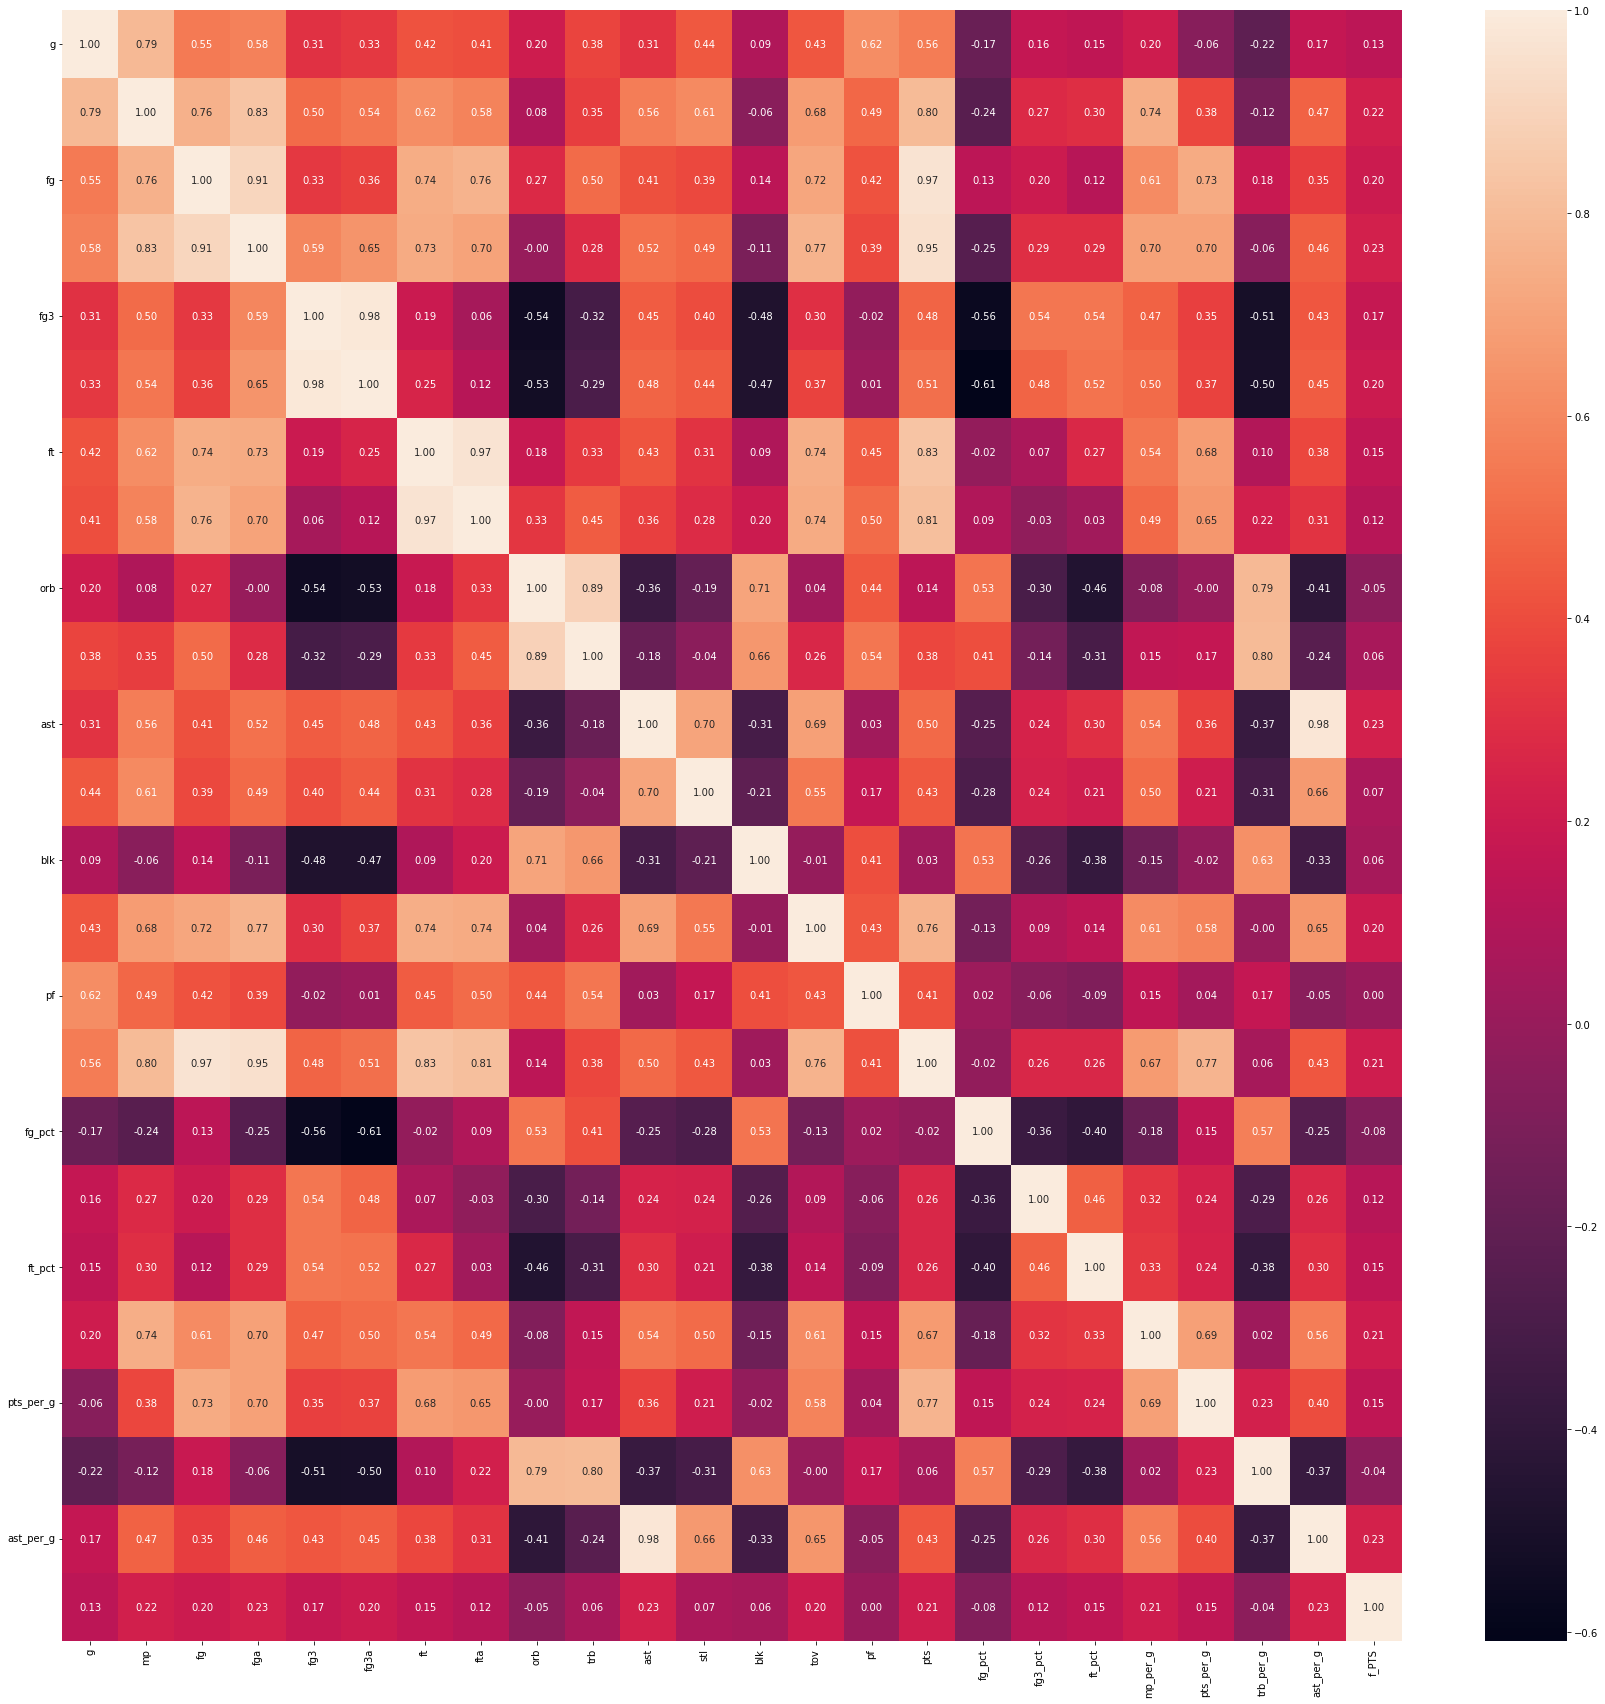

In [37]:
x_feat_list = ['g', 'mp', 'fg', 'fga', 'fg3', 'fg3a', 'ft', 'fta', 'orb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'fg_pct', 'fg3_pct',
       'ft_pct', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g', 'f_PTS']

# Change all the data types to numeric data types
for feature in x_feat_list:
    if feature != 'f_PTS':
        df_all_stats[feature] = pd.to_numeric(df_all_stats[feature])
        

plot_correlation(df_all_stats[x_feat_list], 'Correlation_Heat_Map_with_removed_data_points')

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def basketball_KNN(k, df_stats, x_feat_list, pca_component=2, n_splits=3, stratified=False):
    """ Given basketball player fantasy points with college career stats. Implemented KNN
        classifier and display confusion matrix with accuracy score
        
    Args:
        k (int) : Represent the k in the K Nearest Neighbours Classifier
        df_stats (pd.DataFrame) : Represent the baskball player statistic
        x_feat_list (np.Array) : Represent the feature which will be used for classification
        pca_component (int) : Represent the output dimension of PCA component
        n_splits (int) : Represent the number of k-fold
        stratified (boolean) : True if using StratifiedKFold to do cross-validation and false
                               otherwise
                               
    Return:
        knn_classifier (KNeighborsClassifier) : Represent the trained KNN classifier
    """
    # Extract Important Feature for RandomForest Classifier
    y_feat = 'f_PTS_range'

    x = df_stats.loc[:,x_feat_list].values
    y = df_stats.loc[:,y_feat].values

    # Implemented Principal Component Analysis
    pca = PCA(n_components=pca_component, whiten=True)
    pca.fit(x)
    x_compress = pca.transform(x)

    # Initialize the K Neighors Nearest Classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Stratified is true then do cross-validation if false then return trained model
    if stratified:
        kfold = StratifiedKFold(n_splits=n_splits, shuffle=True)

        y_pred = np.empty_like(y)
        for train_idx, test_idx in kfold.split(x_compress, y):
            # index to split training / test data
            x_train = x[train_idx, :]
            x_test = x[test_idx, :]
            y_true_train = y[train_idx]

            # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
            knn_classifier.fit(x_train, y_true_train)

            # estimate each Basketball player fantasy point bucket for 2021 Season
            y_pred[test_idx] = knn_classifier.predict(x_test)
            
            # displaying the title
            plt_title = 'Cross-Validated KNN Classifier'
    else:
        # fit and apply KNN to the model
        knn_classifier.fit(x_compress, y)
        y_pred = knn_classifier.predict(x_compress)
        
        # displaying the title
        plt_title = 'KNN Classifier on Basketball Player 2021 Fantasy Points with college career stats'
        
        
    # Build Confusion Matrix
    conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)

    # Build up Confusion Matrix GUI
    conf_display = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y))
    conf_display.plot()

    # Set Size and Styling
    plt.gcf().set_size_inches(30,10)
    plt.title(plt_title)
    plt.grid(False)
    
    print(f'The accuracy rate is at {accuracy_score(y, y_pred)}')
    return knn_classifier

To evaluate our model, we will be using confusion matrix as a graphical model to show if our model is valid by showing the truth value against the predicted value. We will show both confusion matrix for cross validated model to show that our model can predict based on new samples, and confusion matrix without cross validation to show that our model overall performance when trained on the entire dataset.

The accuracy rate is at 0.6893939393939394


KNeighborsClassifier(n_neighbors=3)

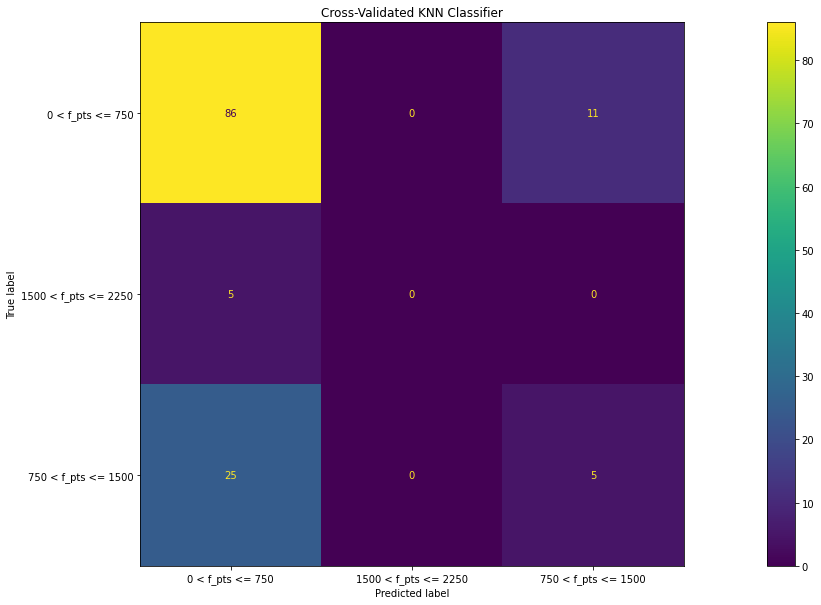

In [41]:
x_feat_list = ['g', 'mp', 'stl', 'fg_pct', 'fg3_pct',
           'ft_pct', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g']

basketball_KNN(3, df_all_stats_bucket, x_feat_list, stratified=True)

The above result a confusion matrix generated from KNN classifier (K=3) where every features will be plot on the graph against f_pts (fantasy point) where if the new data point were introduced to the KNN classifer, the classifier will find the closet k neighbour and return its classification.

The above confustion matrix is representing the cross-validated KNN classifier with principal componet analysis that predict which class of fantasy point the basketball players will be classified based on their college career statistic. As suggested by the confusion matrix, the classifier accurate prediceted 0 < f_pts < 750 fantasy point class since most of the basketball player in their early professional career will be peforming in those ranges. While the accuracy of the classifier significantly drop in 750 < f_pts < 1500 where only ~0.16 basketball player is accurately predicted, and almost ~0.00% in prediciting the NBA-Star class which has a fantasy point of 1500 < f_pts < 2250.

One of the main reason why the classification does not do such a great job in prediciting NBA star is that there is generally less basketball players who is consider to be an NBA star. Thus K-Nearest Negibours tend to associates a player with 0 < f_pts < 750 more since there is a lot more players in those classification. To address samples distribution we will be exploring with different suite of classifier such as RandomForestClassifier.

The accuracy rate is at 0.8181818181818182


KNeighborsClassifier(n_neighbors=3)

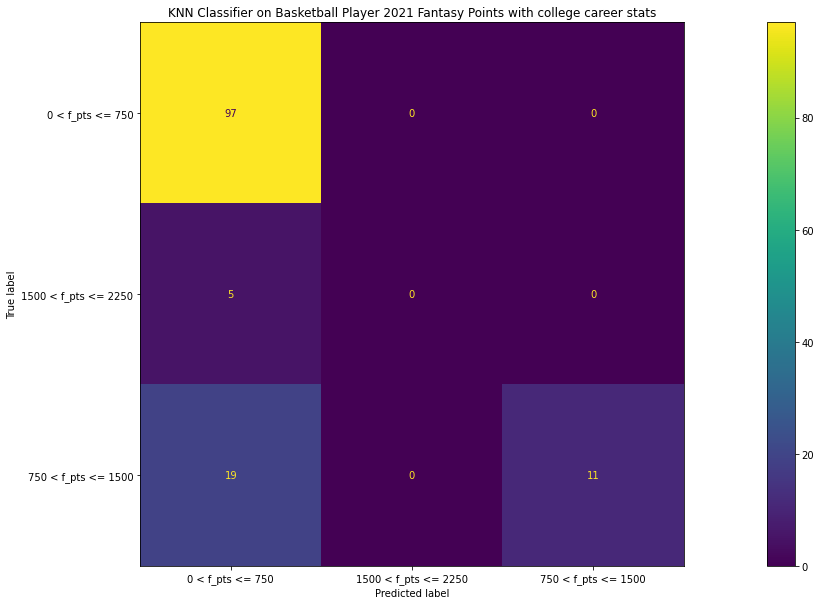

In [42]:
x_feat_list = ['g', 'mp', 'stl', 'fg_pct', 'fg3_pct',
           'ft_pct', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g']

# Without Stratified K Fold cross validation
basketball_KNN(3, df_all_stats_bucket, x_feat_list, stratified=False)

Here is the confusion matrix on KNN classifier without cross validation, where accuracy rate is around 80%. The accuracy rate varies between buckets where the classifier accurately most of player who scored 0 - 750 fantasy point based on college career stats, while 36% accurate for player who scored 750 - 1500 fantasy points, and 0% for 1500 - 2250 fantasy points.

### RandomForestClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

def basketball_RandomForestClassifier(max_depth, df_stats, x_feat_list, pca_component=2, n_splits=3, stratified=False):
    """ Given basketball player fantasy points with college career stats. Implemented 
        RandomForest classifier and display confusion matrix with accuracy score
        
    Args:
        max_depth (int) : Represent the depth in the Forest Classifier
        df_stats (pd.DataFrame) : Represent the baskball player statistic
        x_feat_list (np.Array) : Represent the feature which will be used for classification
        pca_component (int) : Represent the output dimension of PCA component
        n_splits (int) : Represent the number of k-fold
        stratified (boolean) : True if using StratifiedKFold to do cross-validation and false
                               otherwise
                               
    Return:
        accuracy_rate (float) : Represent the accuracy score of the classifier
    """
    # Extract Important Feature for RandomForest Classifier
    y_feat = 'f_PTS_range'

    x = df_stats.loc[:,x_feat_list].values
    y = df_stats.loc[:,y_feat].values

    # Implemented Principal Component Analysis
    pca = PCA(n_components=pca_component, whiten=True)
    pca.fit(x)
    x_compress = pca.transform(x)

    # Initialize the RandomForestClassifier
    rf_basketball = RandomForestClassifier(max_depth=max_depth)
    
    # Stratified is true then do cross-validation if false then return trained model
    if stratified:
        kfold = StratifiedKFold(n_splits=n_splits, shuffle=True)
        y_pred = np.empty_like(y)
        for train_idx, test_idx in kfold.split(x_compress, y):
            # index to split training / test data
            x_train = x[train_idx, :]
            x_test = x[test_idx, :]
            y_true_train = y[train_idx]

            # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
            rf_basketball.fit(x_train, y_true_train)

            # estimate each Basketball player fantasy point bucket for 2021 Season
            y_pred[test_idx] = rf_basketball.predict(x_test)
            
            # displaying the title
            plt_title = 'Cross-Validated KNN Classifier'
    else:
        # fit and apply KNN to the model
        rf_basketball.fit(x_compress, y)
        y_pred = rf_basketball.predict(x_compress)

        # displaying the title
        plt_title = 'KNN Classifier on Basketball Player 2021 Fantasy Points with college career stats'
        
    # Build Confusion Matrix
    conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)

    # Build up Confusion Matrix GUI
    conf_display = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y))
    conf_display.plot()

    # Set Size and Styling
    plt.gcf().set_size_inches(30,10)
    plt.title(plt_title)
    plt.grid(False)
    
    print(f'The accuracy rate is at {accuracy_score(y, y_pred)}')
    return rf_basketball

The accuracy rate is at 0.75


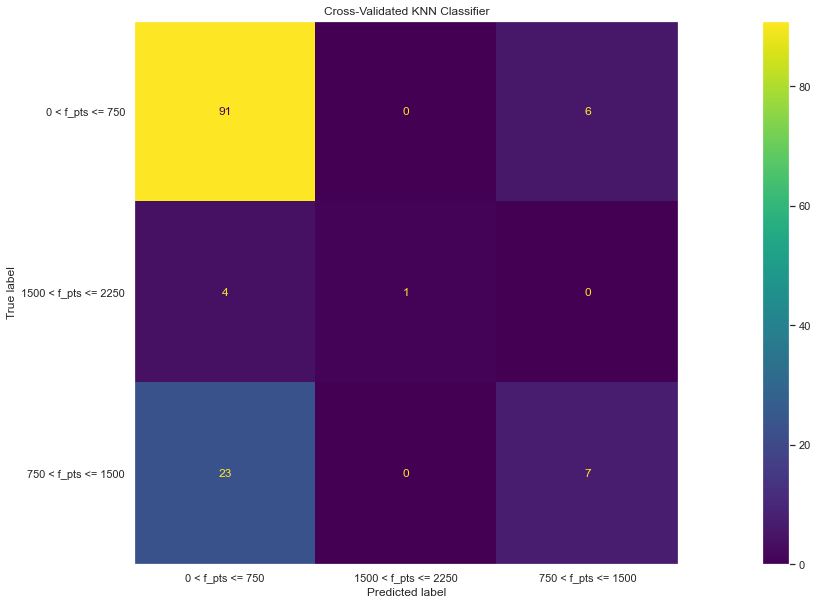

In [73]:
x_feat_list = ['g', 'mp', 'stl', 'fg_pct', 'fg3_pct',
       'ft_pct', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g']

# RandomForestClassifier without Stratified K Fold cross validation
rf_basketball = basketball_RandomForestClassifier(5, df_all_stats_bucket, x_feat_list, n_splits=2 ,stratified=True)

Similar to K Nearest Neighbours the accuracy rate in predicting basktball player with 0 < f_PTS < 750 by the RandomForestClassifier is around ~0.97 while the accuracy drop significantly for other class ~ 0.20 for 750 < f_pts < 1500 and ~0.20 for 1500 < f_pts < 2250.

The accuracy rate is at 0.8712121212121212


RandomForestClassifier(max_depth=5)

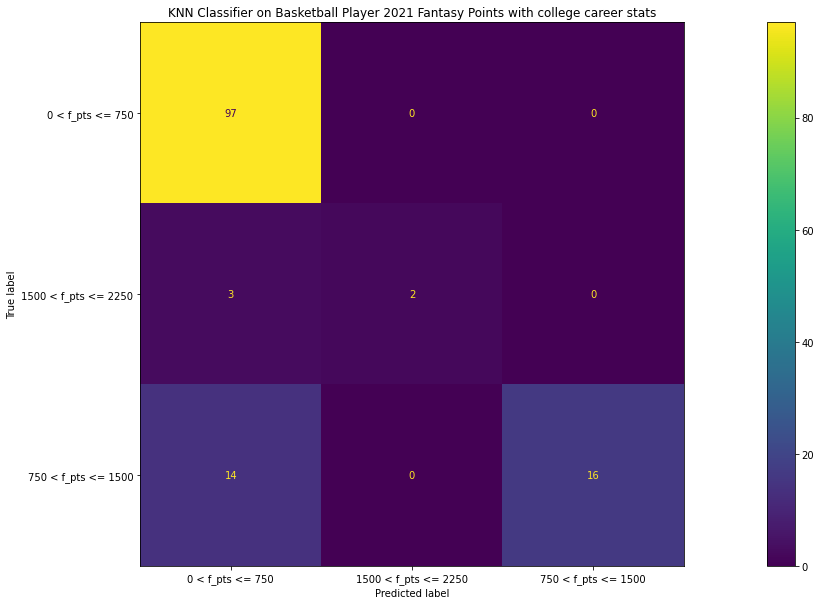

In [51]:
x_feat_list = ['g', 'mp', 'stl', 'fg_pct', 'fg3_pct',
       'ft_pct', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g']

# RandomForestClassifier without Stratified K Fold cross validation
basketball_RandomForestClassifier(5, df_all_stats_bucket, x_feat_list, stratified=False)

When comparing the overall performance between KNN and RandomForestClassifier, the randomForestClassifier is more accurate than KNN as it does not heavily relies on other samples for classification. Which can be reflected upon the accuracy score in the cross validated model of KNN and randomForest, where on average the KNN score 0.67 - 0.72 and RandomForest score on average 0.70 - 0.76. 

### Feature Importance
Identified which feature significantly impact the gini coefficient

In [62]:
"""
Plot Feature Importance
"""

def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in Gini across all Decision Trees)')

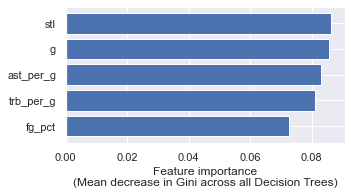

In [63]:
import numpy as np
import seaborn as sns

sns.set()
plot_feat_import(x_feat_list, rf_basketball.feature_importances_, limit=5)

### Linear Regression
Since both KNN classifier and RandomForest Classifier did farely poor jobs in predicting which players will become a NBA star. We will be exploring Regression algorithm especially Lasso Regression to see if regressional model can come up with a better model.

In [64]:
df_all_stats_bucket.dtypes

# Convert all column to Numeric Data
for feature in x_feat_list:
    df_all_stats_bucket[feature] = pd.to_numeric(df_all_stats_bucket[feature])
    

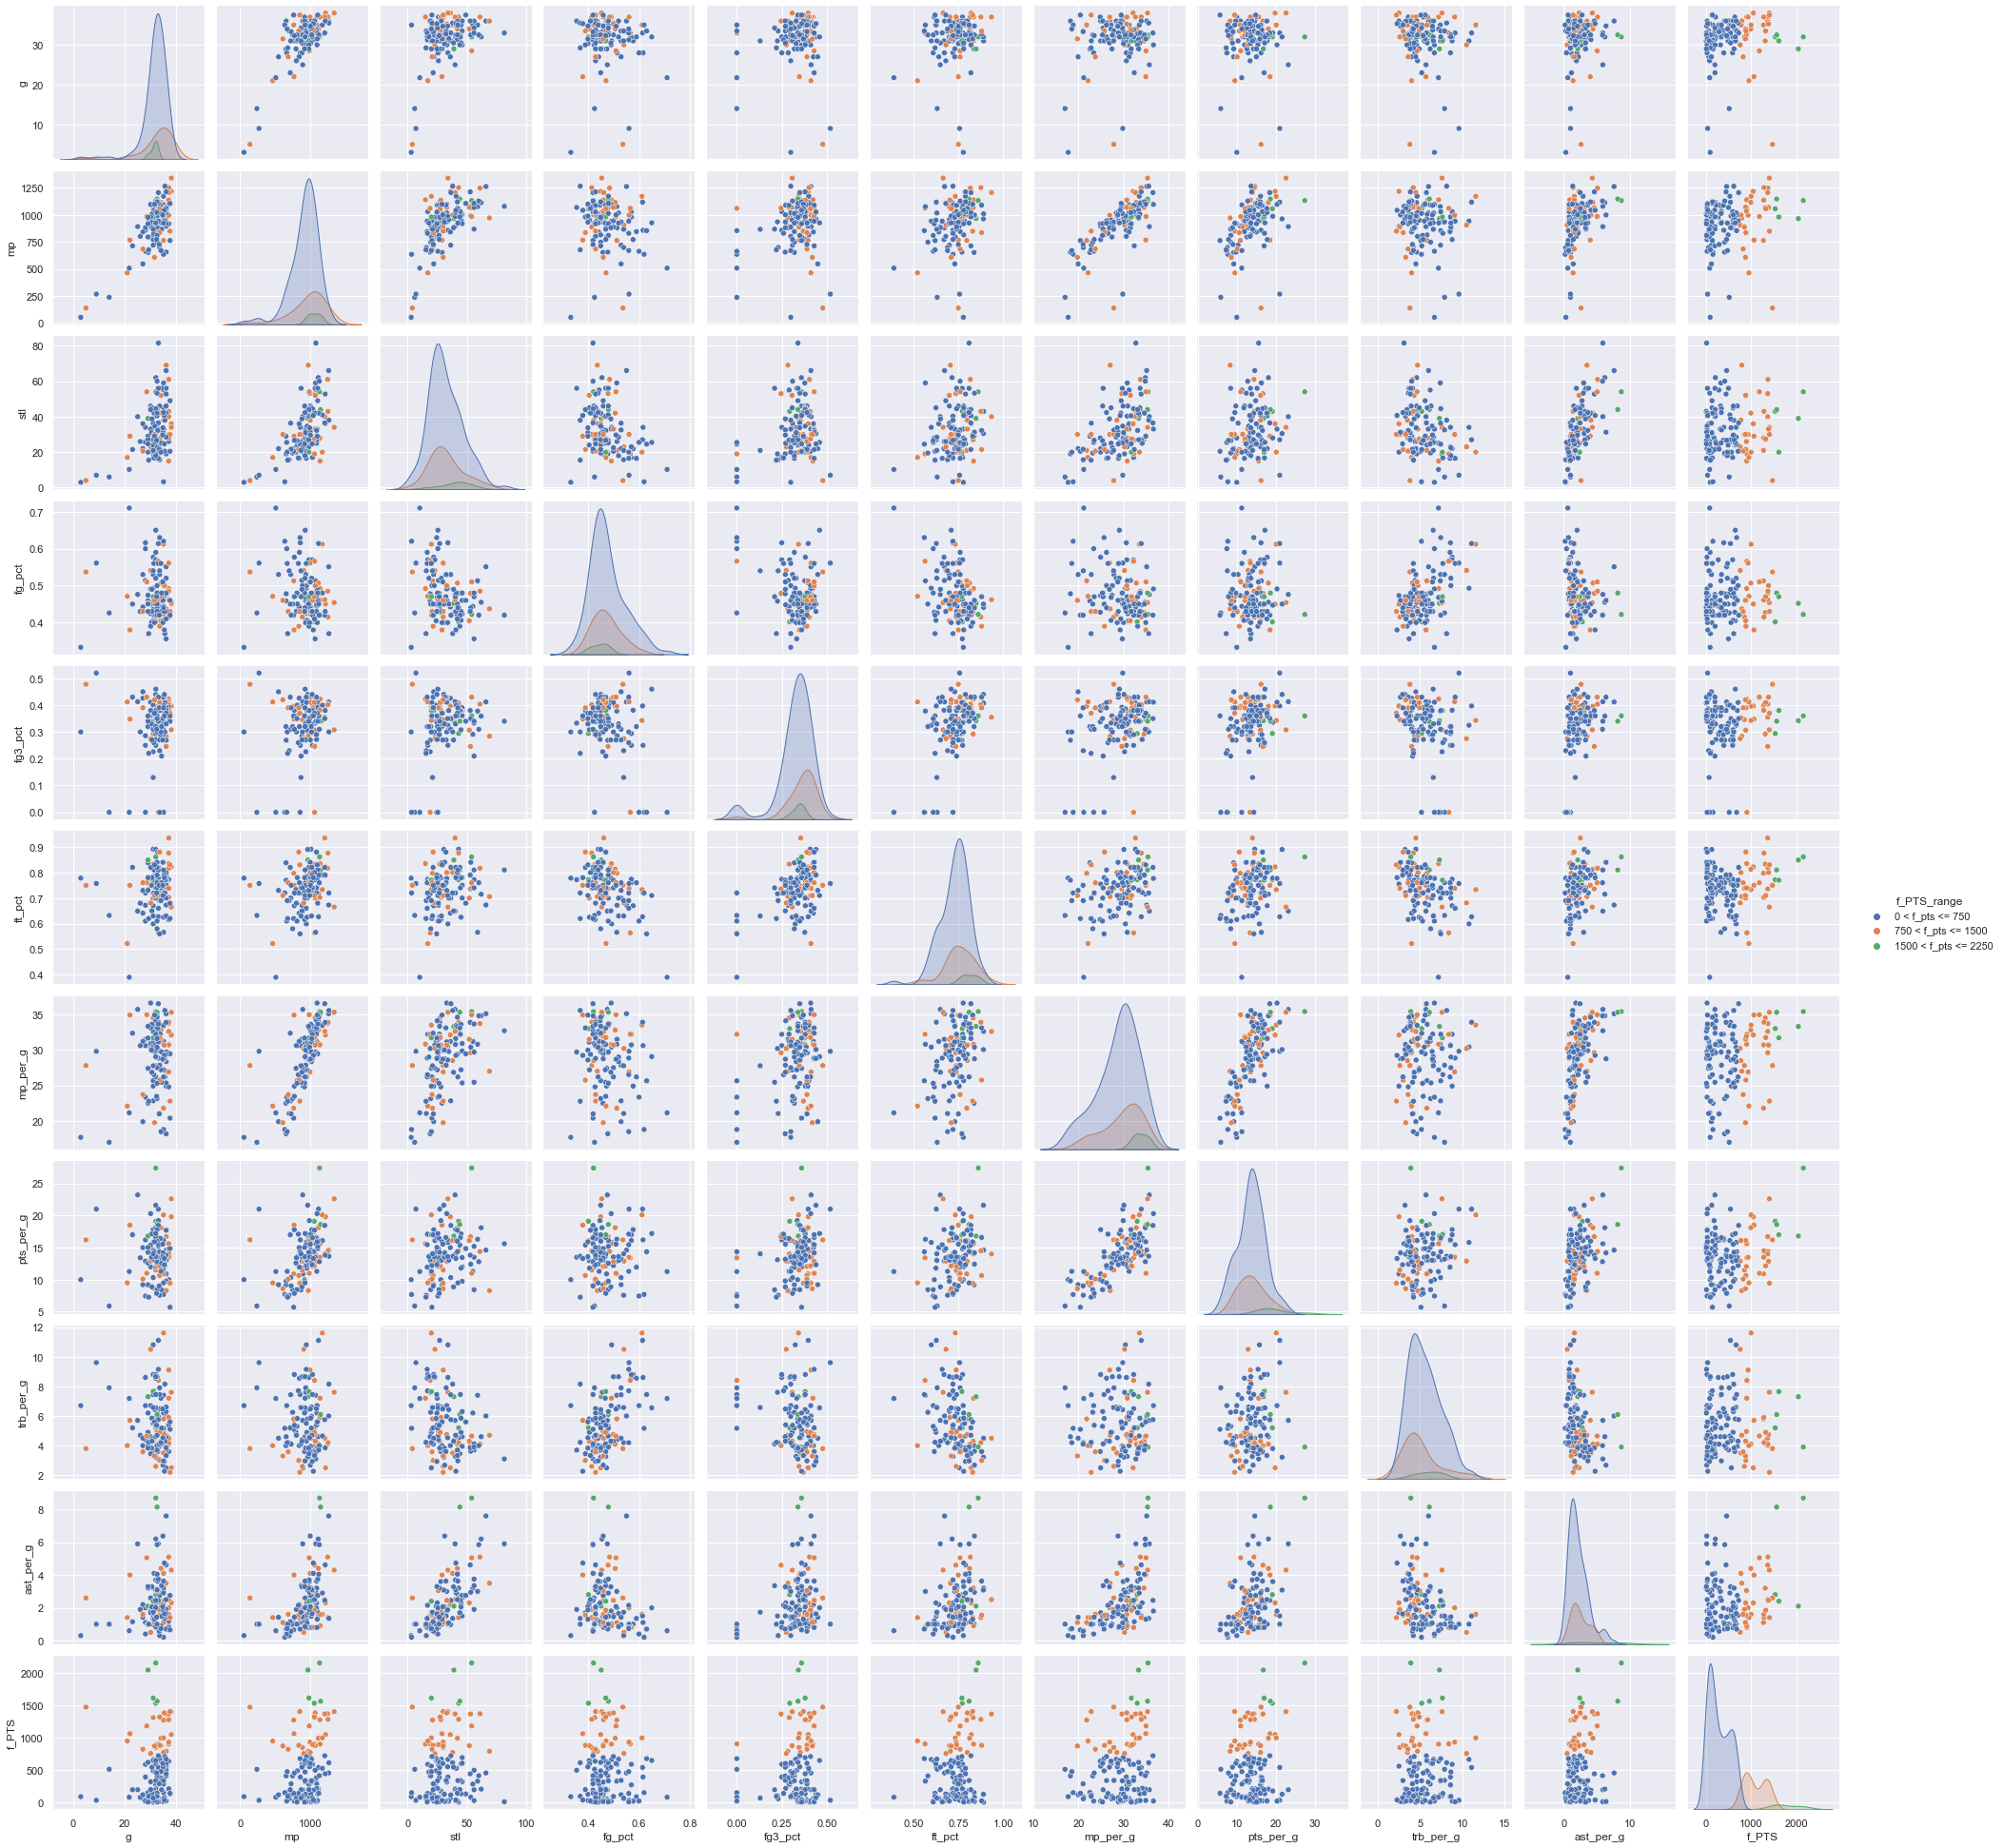

In [65]:
## Pair Plotting

sns.pairplot(df_all_stats_bucket, hue="f_PTS_range")

### Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

def regress_Basketball(df_all_stat, x_feat_list, y_feat, stratified=True):
    """ linear regression, displays model w/ coef
    
    Args:
        df (pd.DataFrame): basketball dataframe
        x_feat_list (list): list of all features in model
        y_feat (list): target feature
        verbose (bool): toggles command line output
        
    Returns:
        reg (DecisionTreeRegressor): model fit to data
    """
    # initialize regression object
    reg = LinearRegression()

    # get target variable
    x = df_all_stat.loc[:, x_feat_list].values
    y = df_all_stat.loc[:, y_feat].values

    # Stratified is true then do cross-validation if false then return trained model
    if stratified:
        kfold = StratifiedKFold(n_splits=3, shuffle=True)
        y_pred = np.empty_like(y)
        for train_idx, test_idx in kfold.split(x, y):
            # index to split training / test data
            x_train = x[train_idx, :]
            x_test = x[test_idx, :]
            y_true_train = y[train_idx]

            # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
            reg.fit(x_train, y_true_train)

            # estimate each Basketball player fantasy point bucket for 2021 Season
            y_pred[test_idx] = reg.predict(x_test)
            
    else:
        # fit regression
        reg.fit(x, y)

        # compute / store r2
        y_pred = reg.predict(x)
    
    r2 = r2_score(y_true=y, y_pred=y_pred)
    print(r2)
    return reg

In [67]:
reg = regress_Basketball(df_all_stats, x_feat_list, 'f_PTS', stratified=True)

-0.1377600604008553


/Users/jirawatzhou/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


### Lasso Regression